# **Softmax Gradient Update**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

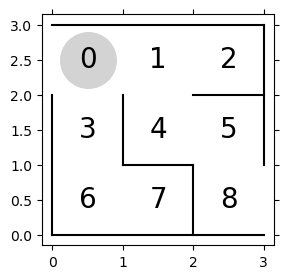

In [25]:
# 미로
fig = plt.figure(figsize=(3, 3))

plt.plot([0, 3], [3, 3], color='k')
plt.plot([0, 3], [0, 0], color='k')
plt.plot([0, 0], [0, 2], color='k')
plt.plot([3, 3], [1, 3], color='k')
plt.plot([1, 1], [1, 2], color='k')
plt.plot([2, 3], [2, 2], color='k')
plt.plot([2, 1], [1, 1], color='k')
plt.plot([2, 2], [0, 1], color='k')

for i in range(3):
    for j in range(3):
        plt.text(0.5+i, 2.5-j, str(i+j*3), size=20, ha='center', va='center')

circle, = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markersize=40)

plt.tick_params(axis='both', which='both', bottom='off', top='off',
        labelbottom='off', right='off', left='off', labelleft='off')
plt.box('off')

In [26]:
# 상, 우, 하, 좌
theta_initial = np.array([
    [np.nan, 1, 1, np.nan],
    [np.nan, 1, 1, 1],
    [np.nan, np.nan, np.nan, 1],
    [1, np.nan, 1, np.nan],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, 1, 1],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, np.nan, 1]
]
)

In [60]:
def get_pi(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    exp_theta = np.exp(theta)

    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
    pi = np.nan_to_num(pi)

    return pi

In [61]:
pi_initial = get_pi(theta_initial)
print(pi_initial)

[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


In [62]:
# 정책에 따른 행동
def get_action(pi, state):
    return np.random.choice([0, 1, 2, 3], p=pi[state])

In [63]:
# 행동에 따른 다음 상태
def get_state_next(state, action):
    if action == 0:
        return state - 3
    elif action == 1:
        return state + 1
    elif action == 2:
        return state + 3
    elif action == 3:
        return state - 1

In [64]:
def play(pi):
    state = 0
    state_action = [[0, np.nan]]

    while True:
        action = get_action(pi, state)
        next_state = get_state_next(state, action)

        # 업데이트
        state_action[-1][1] = action
        state_action.append([next_state, np.nan])

        if next_state == 8:
            break
        else:
            state = next_state
    
    return state_action

In [65]:
state_action = play(pi_initial)
print(state_action)
print(f'1 ep Step : {len(state_action)+1}')

[[0, 2], [3, 2], [6, 0], [3, 0], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 2], [3, 0], [0, 2], [3, 2], [6, 1], [7, 3], [6, 1], [7, 3], [6, 0], [3, 0], [0, 1], [1, 2], [4, 1], [5, 3], [4, 1], [5, 2], [8, nan]]
1 ep Step : 28


In [86]:
def update_theta(theta, pi, state_action):
    eta = 0.1 # 학습 계수
    total = len(state_action) - 1 # 총 스텝 수
    [state_count, action_count] = theta.shape # 상황 수, 행동 수
    
    delta_theta = theta.copy() # 파라미터 theta 변화량
    for i in range(0, state_count):
        for j in range(0, action_count):
            if not (np.isnan(theta[i, j])):
                # 특정한 상태(0~7)에서 특정한 행동(상, 우, 하, 좌)를 선택한 횟수
                state_action_ij = [sa for sa in state_action if sa == [i, j]]
                n_ij = len(state_action_ij)

                # 특정한 산택에서 선택한 행동의 횟수
                state_action_i = [sa for sa in state_action if sa[0] == i]
                n_i = len(state_action_i)

                delta_theta[i, j] = (n_ij + pi[i, j] * n_i) / total # 변화량

    return theta + eta * delta_theta # update

In [105]:
stop_epsilon = 1e-3 # 임계값
theta = theta_initial # 세타 초기화
pi = pi_initial # 정책 초기화

for episode in range(1000):
    state_action = play(pi) # 1 ep 실행
    
    # 파라미터 및 정책 업데이트
    theta = update_theta(theta, pi, state_action)
    pi_new = get_pi(theta)
    pi_delta = np.sum(np.abs(pi_new - pi))
    pi = pi_new

    # 출력
    print(f'Episode: {episode}, Step: {len(state_action)-1}, pi_delta: {pi_delta:.4f}')

    if pi_delta < stop_epsilon:
        break

Episode: 0, Step: 6, pi_delta: 0.0324
Episode: 1, Step: 34, pi_delta: 0.0090
Episode: 2, Step: 54, pi_delta: 0.0129
Episode: 3, Step: 6, pi_delta: 0.0320
Episode: 4, Step: 22, pi_delta: 0.0137
Episode: 5, Step: 22, pi_delta: 0.0116
Episode: 6, Step: 10, pi_delta: 0.0294
Episode: 7, Step: 4, pi_delta: 0.0499
Episode: 8, Step: 32, pi_delta: 0.0128
Episode: 9, Step: 66, pi_delta: 0.0120
Episode: 10, Step: 38, pi_delta: 0.0041
Episode: 11, Step: 26, pi_delta: 0.0161
Episode: 12, Step: 18, pi_delta: 0.0143
Episode: 13, Step: 68, pi_delta: 0.0079
Episode: 14, Step: 10, pi_delta: 0.0262
Episode: 15, Step: 36, pi_delta: 0.0153
Episode: 16, Step: 24, pi_delta: 0.0051
Episode: 17, Step: 52, pi_delta: 0.0093
Episode: 18, Step: 8, pi_delta: 0.0263
Episode: 19, Step: 28, pi_delta: 0.0211
Episode: 20, Step: 30, pi_delta: 0.0161
Episode: 21, Step: 6, pi_delta: 0.0351
Episode: 22, Step: 4, pi_delta: 0.0519
Episode: 23, Step: 16, pi_delta: 0.0135
Episode: 24, Step: 10, pi_delta: 0.0294
Episode: 25, Ste

In [107]:
# 애니메이션을 정기적으로 처리하는 함수
def animate(i):
    state = state_action[i][0]
    circle.set_data((state % 3) + 0.5, 2.5 - int(state / 3))
    return circle

# 애니메이션 표시
anim = animation.FuncAnimation(fig, animate, \
        frames=len(state_action), interval=200, repeat=False)
HTML(anim.to_jshtml())

/tmp/ipykernel_3967/1968855144.py:4: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  circle.set_data((state % 3) + 0.5, 2.5 - int(state / 3))
